[View in Colaboratory](https://colab.research.google.com/github/christopher11/machine-learning/blob/master/Neural_nets/Assignments/CHRISTOPHER_BATCH_4_ASSIGNMENT4A.ipynb)

## CHRISTOPHER - BATCH 4

## Accuracy : 99.19 %

# **Import Libraries and modules**

In [30]:
# https://keras.io/
!pip install -q keras
import keras

In [31]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add

from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization

from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


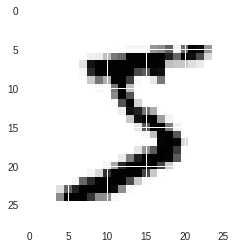

In [33]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [34]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [36]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [37]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [38]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(3, (7, 7),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(5, (5,5), activation='relu'))
model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(12, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(12, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 3)         150       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 3)         12        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 5)         380       
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 5)         20        
_________________________________________________________________
average_pooling2d_3 (Average (None, 12, 12, 5)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 12)        552       
__________

In [41]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.2516 - acc: 0.9235
Epoch 2/10
18880/60000 [========>.....................] - ETA: 26s - loss: 0.1107 - acc: 0.9650

60000/60000 [==============================] - 39s 650us/step - loss: 0.1029 - acc: 0.9681
Epoch 3/10
32288/60000 [===============>..............] - ETA: 17s - loss: 0.0909 - acc: 0.9718

60000/60000 [==============================] - 39s 649us/step - loss: 0.0879 - acc: 0.9726
Epoch 4/10
38368/60000 [==================>...........] - ETA: 13s - loss: 0.0788 - acc: 0.9751

60000/60000 [==============================] - 39s 645us/step - loss: 0.0771 - acc: 0.9753
Epoch 5/10
41248/60000 [===================>..........] - ETA: 12s - loss: 0.0725 - acc: 0.9770

60000/60000 [==============================] - 39s 646us/step - loss: 0.0713 - acc: 0.9775
Epoch 6/10
42272/60000 [====================>.........] - ETA: 11s - loss: 0.0666 - acc: 0.9791

60000/60000 [==============================] - 39s 649us/step - loss: 0.0666 - acc: 0.9793
Epoch 7/10
41888/60000 [===================>..........] - ETA: 12s - loss: 0.0660 - acc: 0.9789

60000/60000 [==============================] - 40s 663us/step - loss: 0.0653 - acc: 0.9791
Epoch 8/10
42336/60000 [====================>.........] - ETA: 11s - loss: 0.0637 - acc: 0.9801

60000/60000 [==============================] - 39s 658us/step - loss: 0.0620 - acc: 0.9805
Epoch 9/10
42944/60000 [====================>.........] - ETA: 11s - loss: 0.0593 - acc: 0.9817

60000/60000 [==============================] - 40s 659us/step - loss: 0.0598 - acc: 0.9812
Epoch 10/10
42560/60000 [====================>.........] - ETA: 11s - loss: 0.0558 - acc: 0.9824

60000/60000 [==============================] - 40s 659us/step - loss: 0.0570 - acc: 0.9821


In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [44]:
print(score)

[0.025506752100226005, 0.9919]


In [45]:
y_pred = model.predict(X_test)

In [46]:
print(y_pred[:9])
print(y_test[:9])

[[1.22251809e-09 3.96046218e-08 8.56147926e-06 8.72823330e-06
  7.06314174e-12 2.90867153e-08 1.09366411e-12 9.99978185e-01
  3.13315529e-09 4.57495753e-06]
 [1.84258658e-06 5.91252774e-06 9.99988317e-01 4.67339305e-07
  1.08896323e-07 3.34768463e-11 7.42522388e-07 1.54307001e-09
  2.58381965e-06 9.60923785e-09]
 [1.54083898e-06 9.99983788e-01 2.22294238e-06 3.52115904e-07
  2.50612129e-06 4.44945378e-08 2.46943091e-06 3.70195312e-06
  3.17780473e-06 1.75668120e-07]
 [9.98628020e-01 1.22013177e-09 3.57553326e-05 9.93391154e-07
  1.27437092e-08 2.83315549e-05 1.28228439e-03 4.74443631e-08
  1.93049709e-05 5.18574370e-06]
 [9.17281640e-10 7.94056099e-10 4.25682323e-10 5.75901757e-11
  9.99917984e-01 4.59749377e-10 3.12602433e-09 1.64664353e-08
  3.53217224e-08 8.19317356e-05]
 [1.84109081e-06 9.99943018e-01 2.34126810e-06 1.80707502e-07
  4.84068323e-06 1.57522955e-08 9.78615958e-07 9.72027374e-06
  3.68000874e-05 4.33856258e-07]
 [1.63905681e-10 8.61939188e-05 1.02578120e-07 5.16383558e

In [47]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
#@title Default title text
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    print('Input image and %s filters' % (layer_name,))
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()